# Tasty Bytes

Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted
inspiration so we decided to provide it. We started life as a search engine for recipes, helping
people to find ways to use up the limited supplies they had at home.
Now, over two years on, we are a fully fledged business. For a monthly subscription we will put
together a full meal plan to ensure you and your family are getting a healthy, balanced diet
whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients
to your door.

Data Contents
- recipe--Numeric, unique identifier of recipe
- calories--Numeric, number of calories
- carbohydrate--Numeric, amount of carbohydrates in grams
- sugar--Numeric, amount of sugar in grams
- protein--Numeric, amount of protein in grams
- categor--Character, type of recipe. 
- servings--Numeric, number of servings for the recipe
- high_traffic--Character

# POWERPOINT PRESENTATION
A power point presentation was done to present to shareholders. You  can view in the [Link](https://aurione-my.sharepoint.com/:p:/p/kabirat/EeJlU26bz9VNsB710CpyNncB0gBwYz6m_uAmLQJ-i4GN2Q?e=EHT5ik) 

# DATA VALIDATION
The process of validation involves comparing the data given with the requirements. This proess involves checking each column and it data values, ensuring they are the same data type, there are no missing values or outliers and no leading spaces or trails.

The first step involves importin the necessary libraries. We also view the data types and descriptions with the info() and describe functions(). With this we get to knkow that there are 947 entries{recipes} in the data and 8 columns.

The second step is to check for unique values in the dataset, missing values and outliers. We use, df.unique() for the unique values, isna() for the missing values and using zscore from scipy stats to check for outliers.

With this information, we can begin to clean the data as follows:
1. **Recipe:** This column has the 947 unique values representing 947 recipes. NO cleaning is requires
2. **Calories,Sugar,Protein and Carbohydrates**:These columns are of the float type with 52 null values and no outliers. Simple imputation using the mean value grouped by categories and serving will be used. The mean is used instead of the median because it rightly skewed. 
3. **Category**: This column has 10 unique values as requirement as opposed to the 11 present in the dataset. The category ' Chicken Breast' will be chnaged to chicken. There are no null values.
4. **Servings**: This column is to be changed to a numeric column. The values '4 as a snack' and '6 as a snack' wille be chnaged to 4 and 6 respectively and the colun will be formatted as nunmeric.
5. **High traffic**:All null values will be changed 'Low' for easy categorization.

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np

In [2]:
#using pandas library to view the data given
site_traffic=pd.read_csv('recipe_site_traffic_2212.csv')

site_traffic.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
#using info to view the data type
site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
#using the describe method to view descriptions on the numerical data
site_traffic.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [5]:
#checking for unique values in every categorical column in the dataset
for column in site_traffic.columns:
    if site_traffic[column].dtype=='object':
        print(f"the number of unique values in {column} is {site_traffic[column].nunique()}")
        print('--------')
        print(site_traffic[column].unique())

the number of unique values in category is 11
--------
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
the number of unique values in servings is 6
--------
['6' '4' '1' '2' '4 as a snack' '6 as a snack']
the number of unique values in high_traffic is 1
--------
['High' nan]


In [6]:
#checking for null values
site_traffic.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

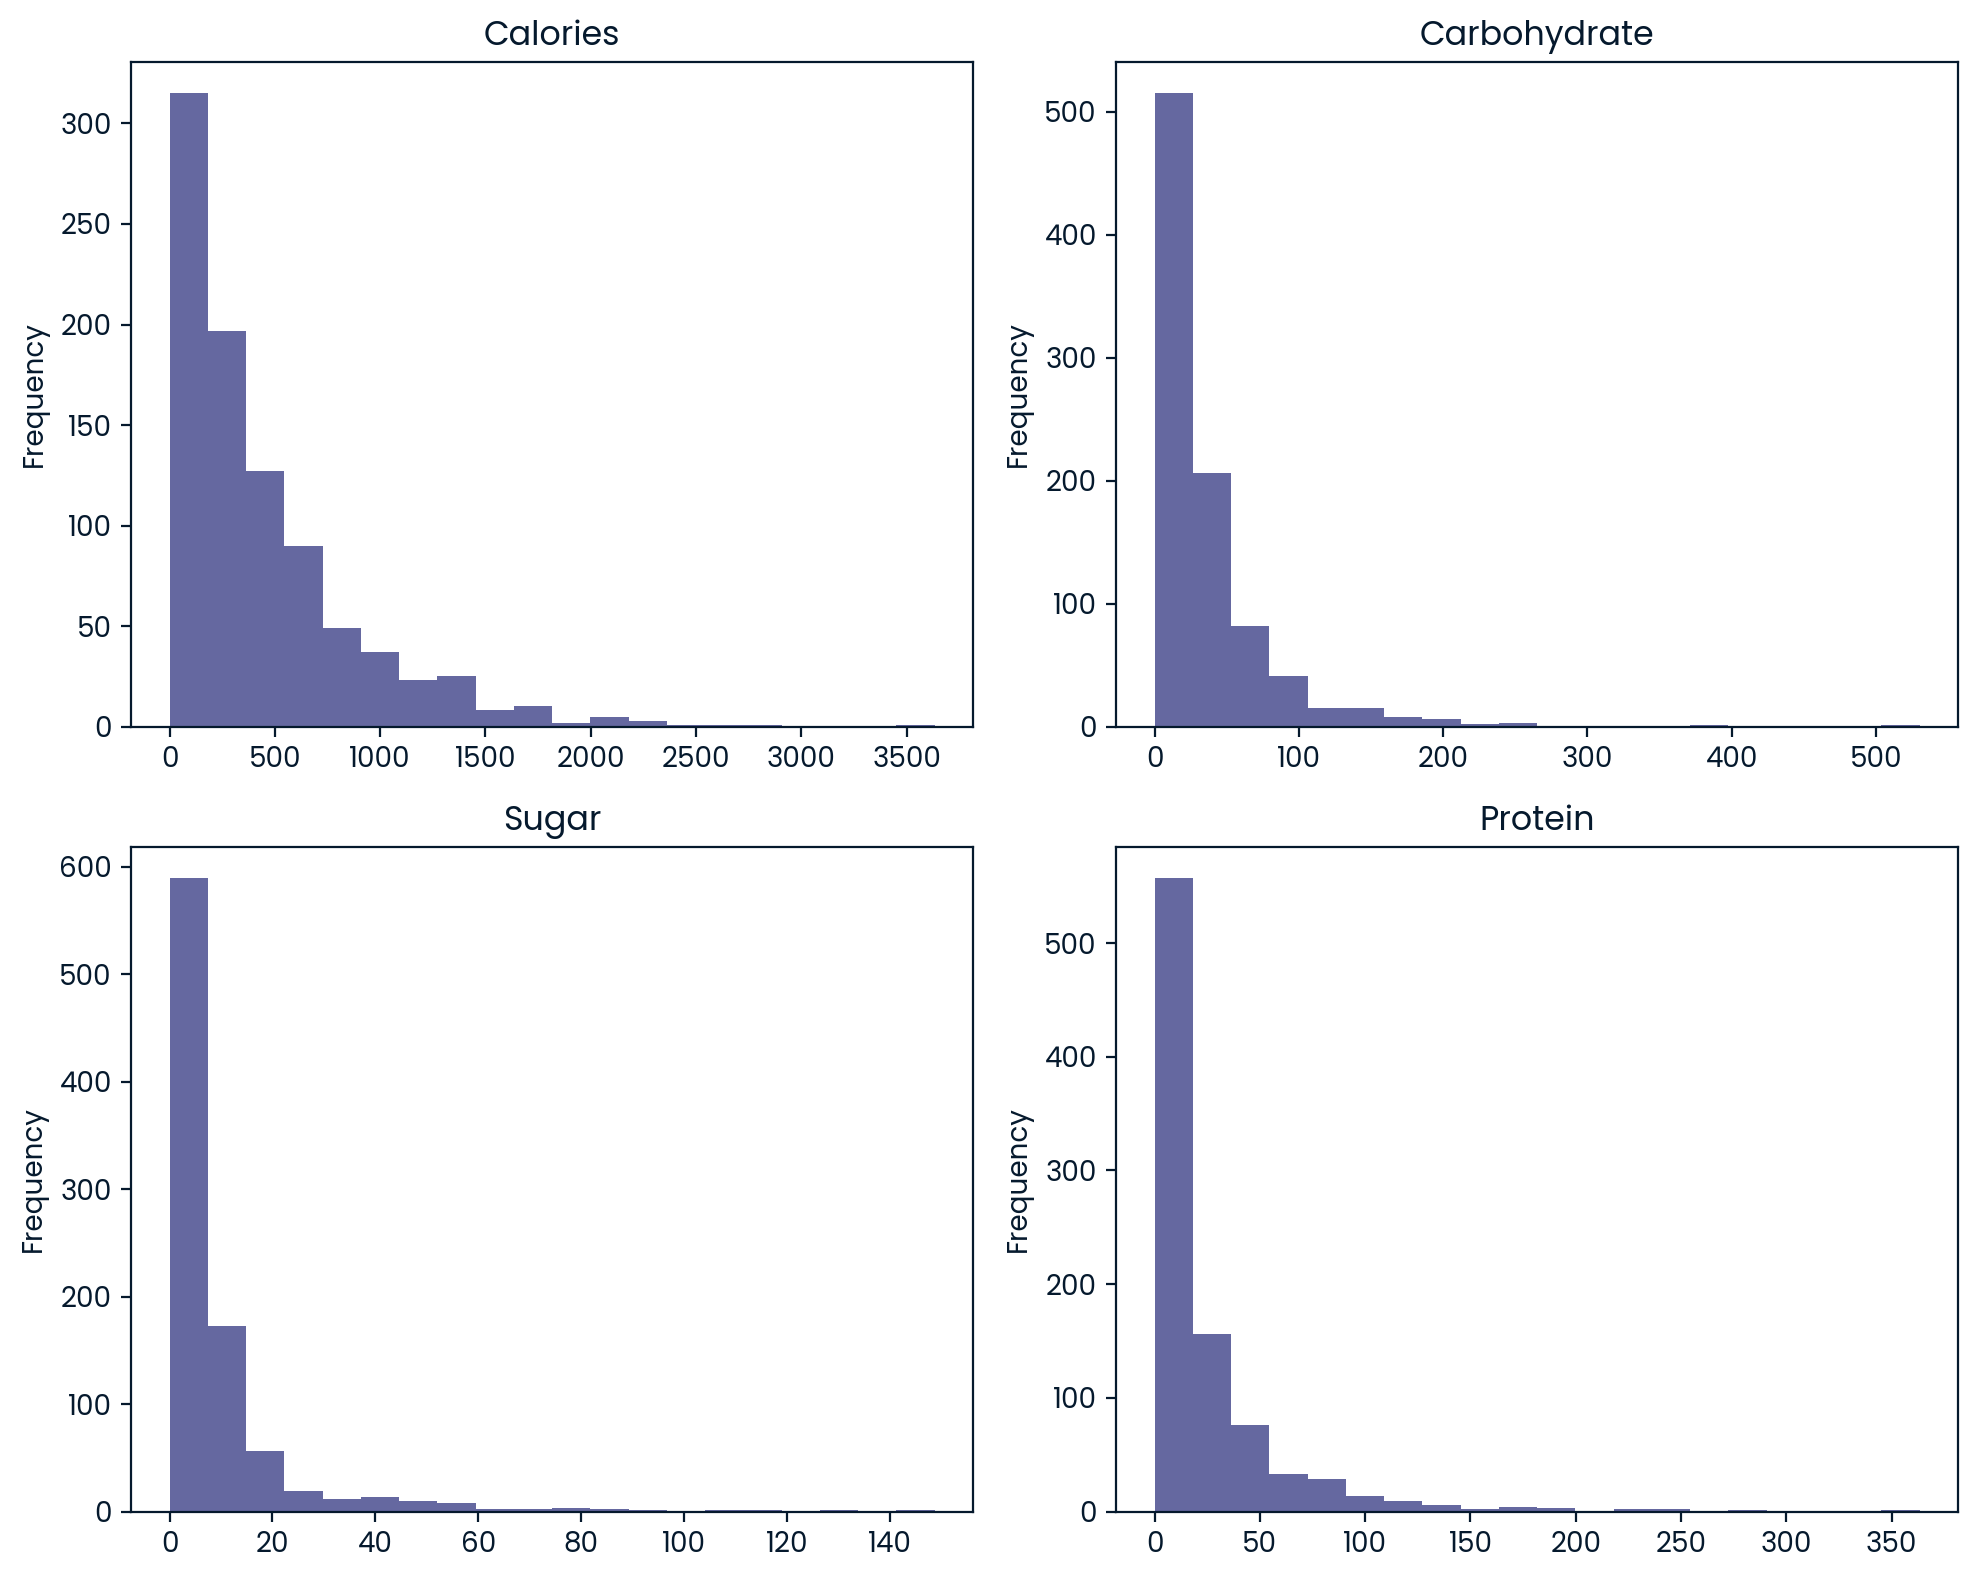

In [7]:
#plottin histograms of the the numeric data to view skewness

histograms_to_be_displayed = site_traffic[['calories', 'carbohydrate', 'sugar', 'protein']]

fig, ax = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

# Plot each histogram
histograms_to_be_displayed['calories'].plot(kind='hist', ax=ax[0, 0], title='Calories', bins=20)
histograms_to_be_displayed['carbohydrate'].plot(kind='hist', ax=ax[0, 1], title='Carbohydrate', bins=20)
histograms_to_be_displayed['sugar'].plot(kind='hist', ax=ax[1, 0], title='Sugar', bins=20)
histograms_to_be_displayed['protein'].plot(kind='hist', ax=ax[1, 1], title='Protein', bins=20)

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
# to check for outliers
for column in site_traffic.columns:
    if site_traffic[column].dtype=='float64':
        # Calculate z-scores
        z_scores = zscore(site_traffic[column])
        # Define the outlier threshold (commonly |z| > 3)
        outliers = np.abs(z_scores) > 2
        # Count the number of outliers
        num_outliers = np.sum(outliers)
        print(f"Number of outliers: {num_outliers}")

Number of outliers: 0
Number of outliers: 0
Number of outliers: 0
Number of outliers: 0


In [9]:
#cleaning the Chicken Breast value and chanign to chick
site_traffic['category']=site_traffic['category'].replace({'Chicken Breast':'Chicken'})

In [10]:
#cleaning the serving column
site_traffic['servings']=site_traffic['servings'].replace({'4 as a snack':4,'6 as a snack':6})

site_traffic.servings=site_traffic.servings.astype('int')
site_traffic.servings.unique()

array([6, 4, 1, 2])

In [11]:
#creating a function to imput the mean in missing values for the numeric columns
grouping= site_traffic.groupby(['category','servings'])['calories', 'carbohydrate', 'sugar','protein'].agg('mean')


# Convert the result to a dictionary for easier lookup
grouping_dict=grouping.to_dict(orient='index')

def median_imputer(column):
    # Apply median imputation for each column where the value is missing
    def fill_missing(row):
        if pd.isna(row[column]):
            key = (row['category'], row['servings'])
            # Use the grouping dictionary to fill the missing value, defaulting to original if not found
            return grouping_dict.get(key, {}).get(column, row[column])
        return row[column]
    
    # Apply the fill_missing function to each row
    site_traffic[column] = site_traffic.apply(fill_missing, axis=1)


In [12]:
# Call the function to impute missing values for each relevant column
for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    median_imputer(col)


In [13]:
#replacing all null values with 'Low' in the high traffic columns
site_traffic['high_traffic']=site_traffic['high_traffic'].fillna('Low')

site_traffic.high_traffic.isna().sum()

0

In [14]:
site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


# DATA EXPLORATION

This involves taking a look closer into the data to provide insights and visualize relationships.Firstly lets explore how many recipes generated hight traffic with a donut chart

Secondly we can use pie chart and a side by side bar chart to visualize how popular each category is and which ones generated high traffic

Next we can use a pair plot to visualize the relationship among the sugars, cabohydrates, proteins and calories

## How Many recipes had high or low traffic 
With a simple donut chart we can visualizw how many recipes had high traffic.

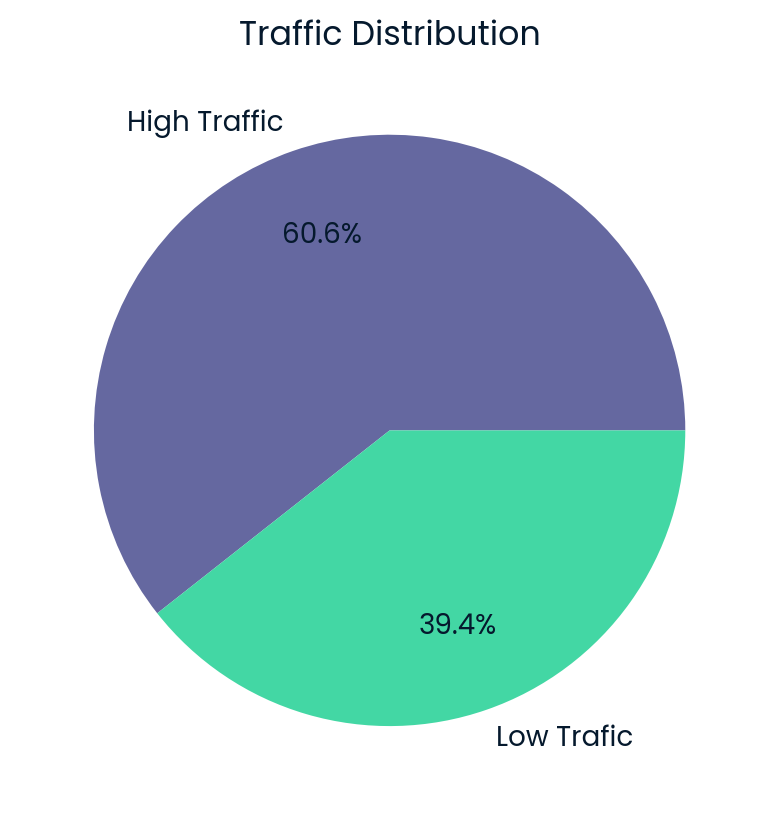

In [15]:
plt.pie(site_traffic['high_traffic'].value_counts(),autopct='%.1f%%',pctdistance=0.7,labels=['High Traffic','Low Trafic'])
plt.title('Traffic Distribution')
plt.show()

Of the 947 recipes being diplayed on the site, 574 oof them generate high traffic

## How Popular are the categories

A pie chart provides a visual representation of the proportions of all 10 recipe categories. Each "slice" of the pie represents a category, with its size indicating the percentage of recipes belonging to that category out of the total. It gives a clear overview of the relative popularity or frequency of each category.




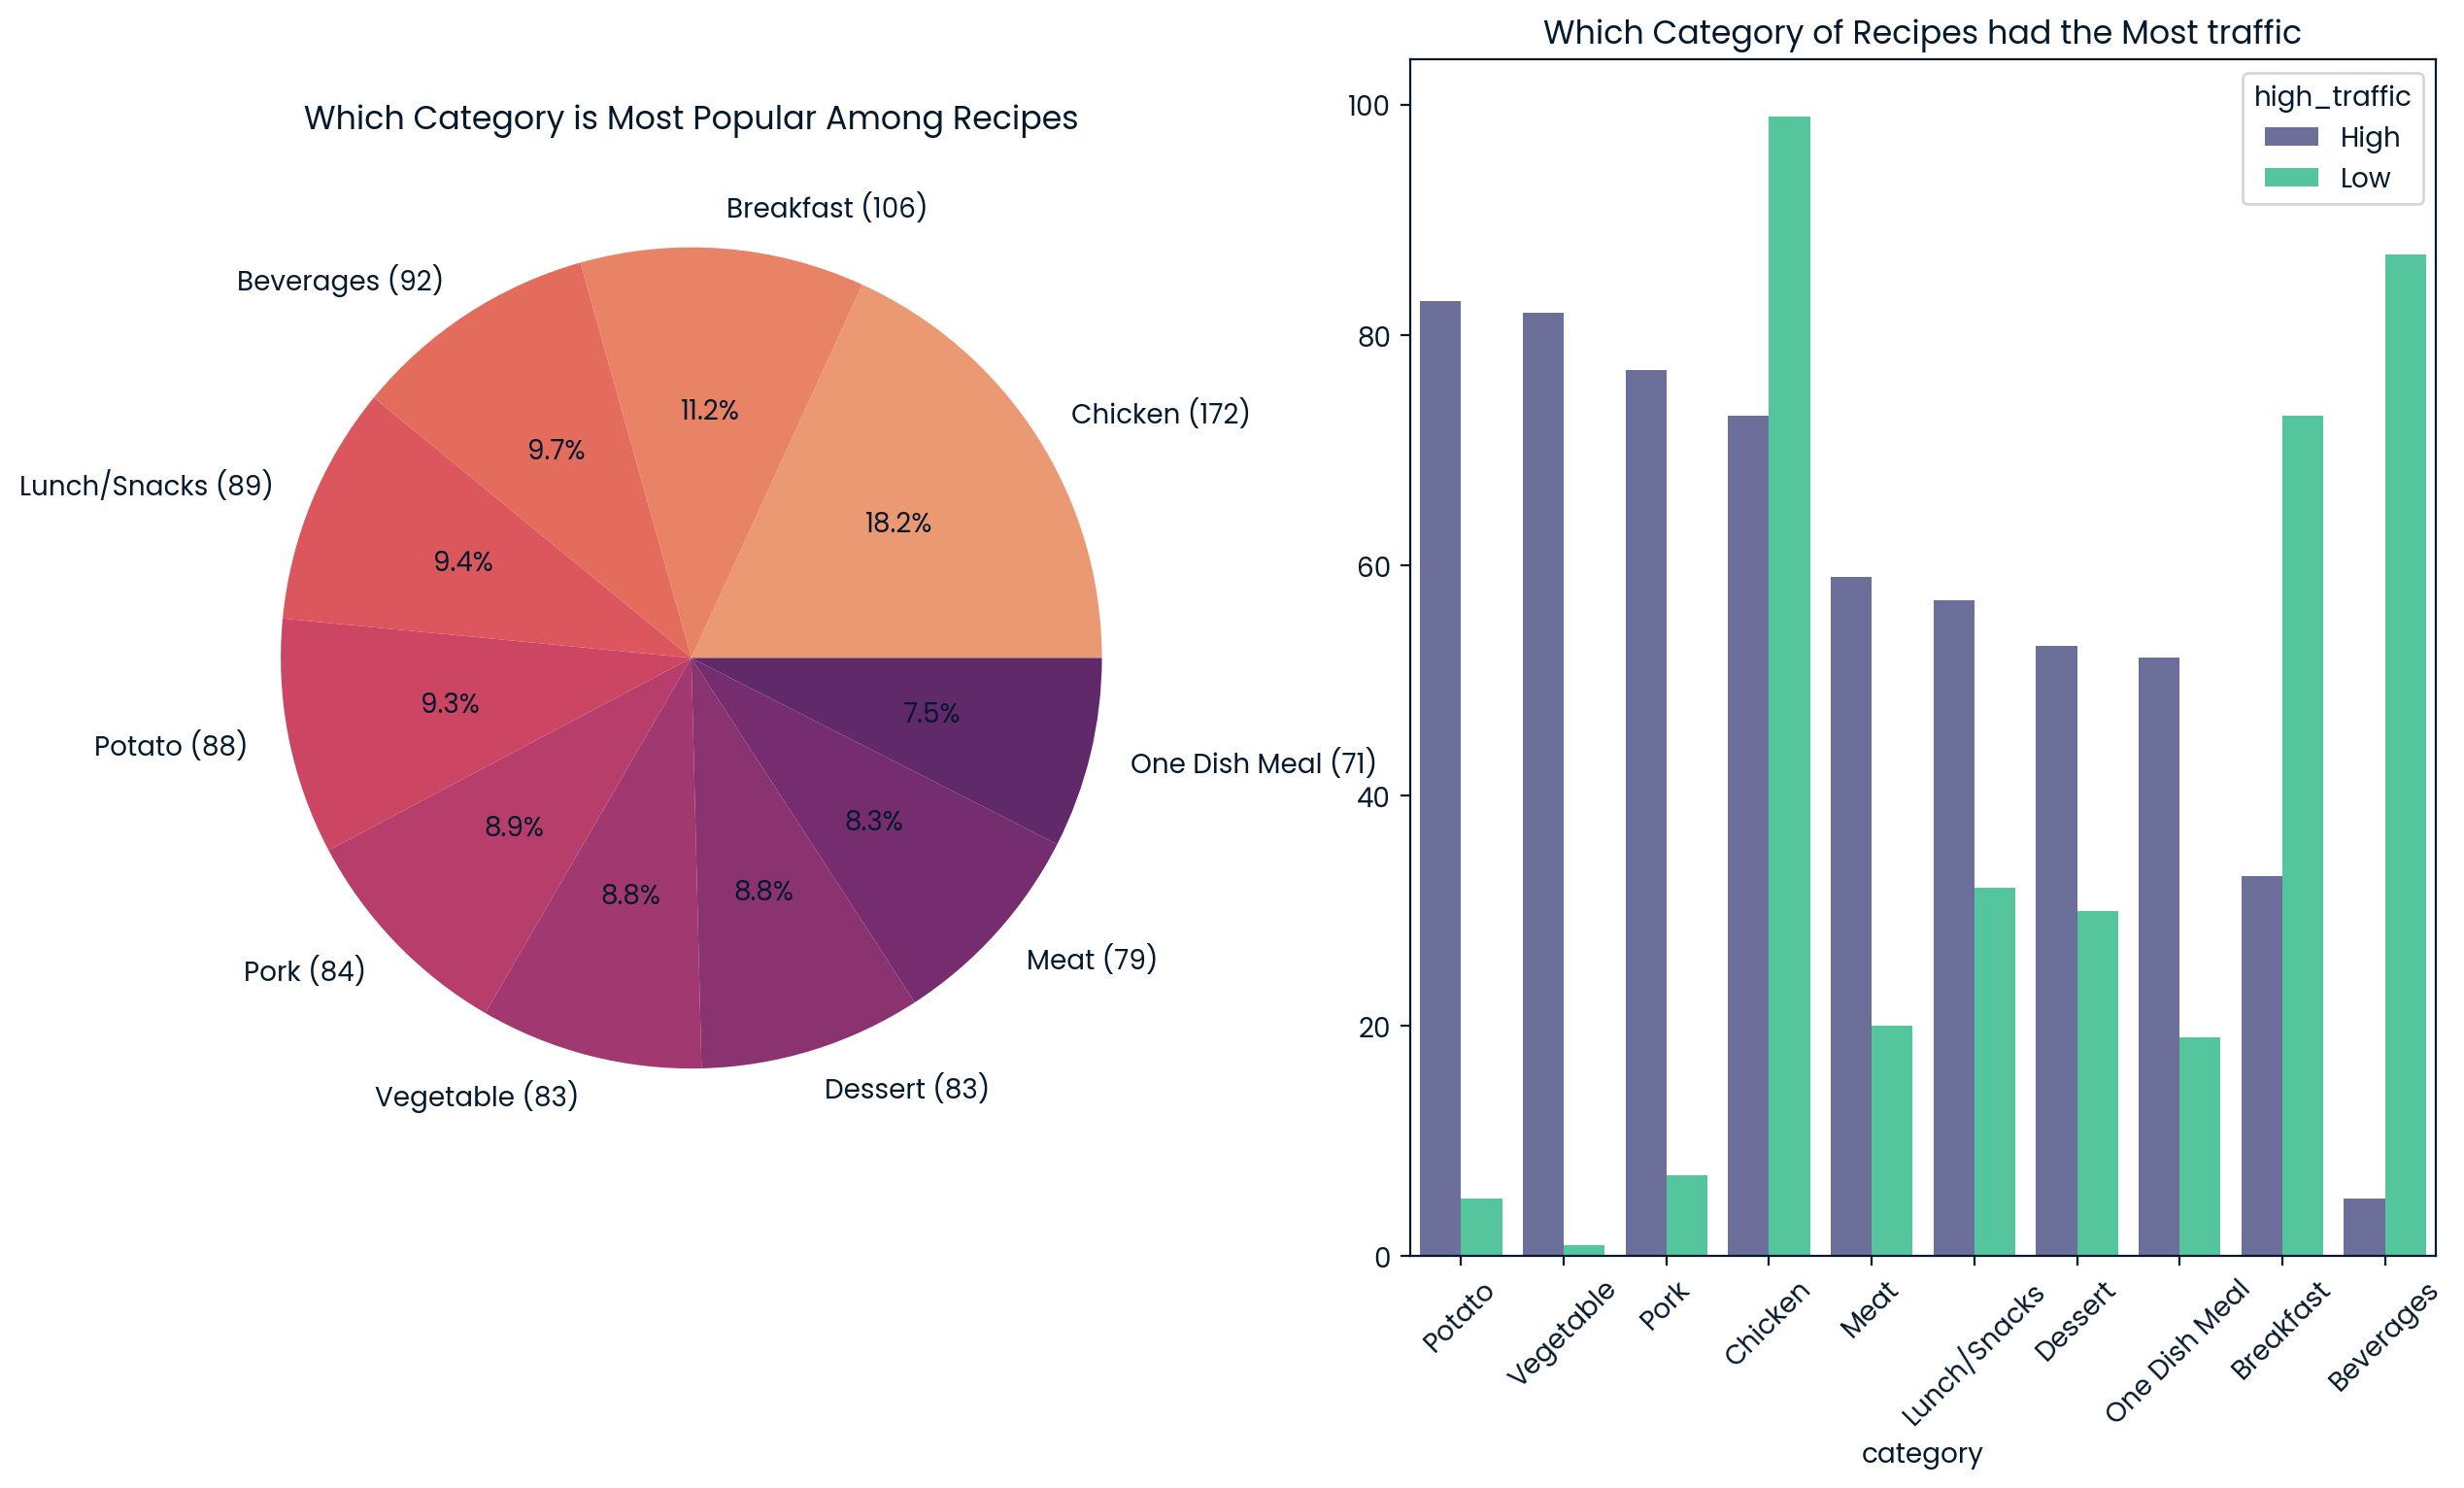

In [16]:
#with a side by side bar chart and a pie chart we visualize how popular each category is
fig,ax=plt.subplots(1,2,figsize=(15,8))
 
site_traffic_c_counts = site_traffic['category'].value_counts()
labels = [f"{method} ({count})" for method, count in zip(site_traffic_c_counts.index, site_traffic_c_counts.values)]

site_traffic_c_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("flare", len(site_traffic_c_counts)),
    labels=labels,ax=ax[0]
)

ax[0].set_title('Which Category is Most Popular Among Recipes')
ax[0].set_ylabel('')

category_order = (
    site_traffic[site_traffic['high_traffic'] == 'High']
    .groupby('category')
    .size()
    .sort_values(ascending=False)
    .index
)

# Plot the countplot with the sorted category order
sns.countplot(
    data=site_traffic, 
    x='category', 
    hue='high_traffic', 
    order=category_order,  # Pass the sorted order
    ax=ax[1]
)

# Rotate the x-axis labels
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45,fontsize=)
ax[1].set_title('Which Category of Recipes had the Most traffic')
ax[1].set_ylabel('')
plt.show()


This visualization offers a detailed perspective on the popularity and engagement of different recipe categories. On the left,the Chicken category clearly stands out, occupying the largest slice of the pie at 18.2% (172 recipes), making it the most popular category overall. Following this, categories like Breakfast, Beverages, and Potato also show significant representation, each contributing between 9% and 11% of the total recipes. Smaller slices such as One Dish Meal (7.5%),Meat,(8.3%) and Dessert (8.8%) represent the less common categories.

On the right, although Chicken in the most popular category, we view clearly, that there is high engagement in the site when a large portion of recipes in categories like Potatoes, Vegetables and Pork recipes were being shown.  This behavior contrasts sharply with categories like Breakfast and Beverages, where high traffic is not as prominent despite their relatively higher popularity in the pie chart on the left.

This indicates an interesting trend: some less popular categories, such as Potatoes and Vegetables, drive substantial user engagement, suggesting these recipes resonate strongly with the audience. Conversely, highly popular categories like Breakfast and Beverages do not show the same level of engagement, as evidenced by the smaller blue bars representing high traffic. This flipped behavior highlights how recipe popularity does not always translate to engagement, pointing to potential differences in user preferences or interaction patterns for these categories.

## Viewing relationships between Calories, Proteins, Carbohydrates and sugars

With scatter plots and a heat map, which visualizes pair wise-scatter plot relationships, we can view how each of the the above columns affect each other.

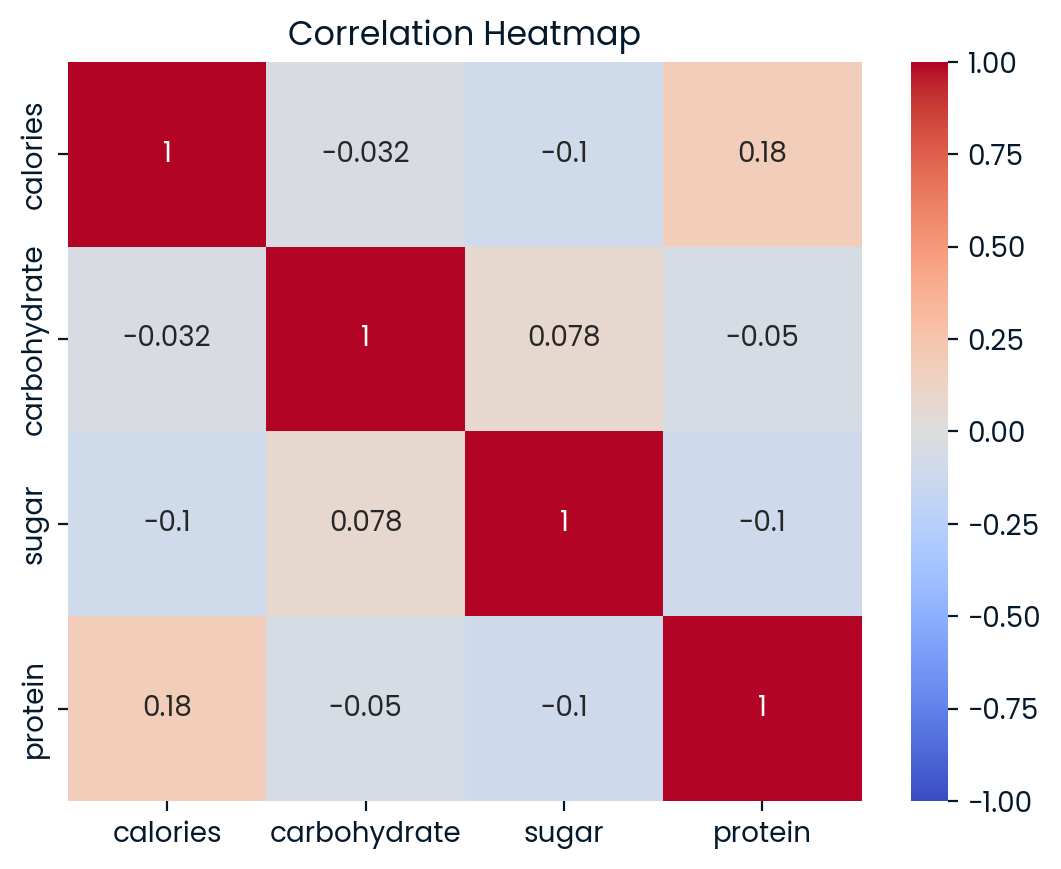

In [17]:
#creating four scatter plots to visualize relationships between the four columns


correlation_matrix = site_traffic[['calories', 'carbohydrate', 'sugar', 'protein']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

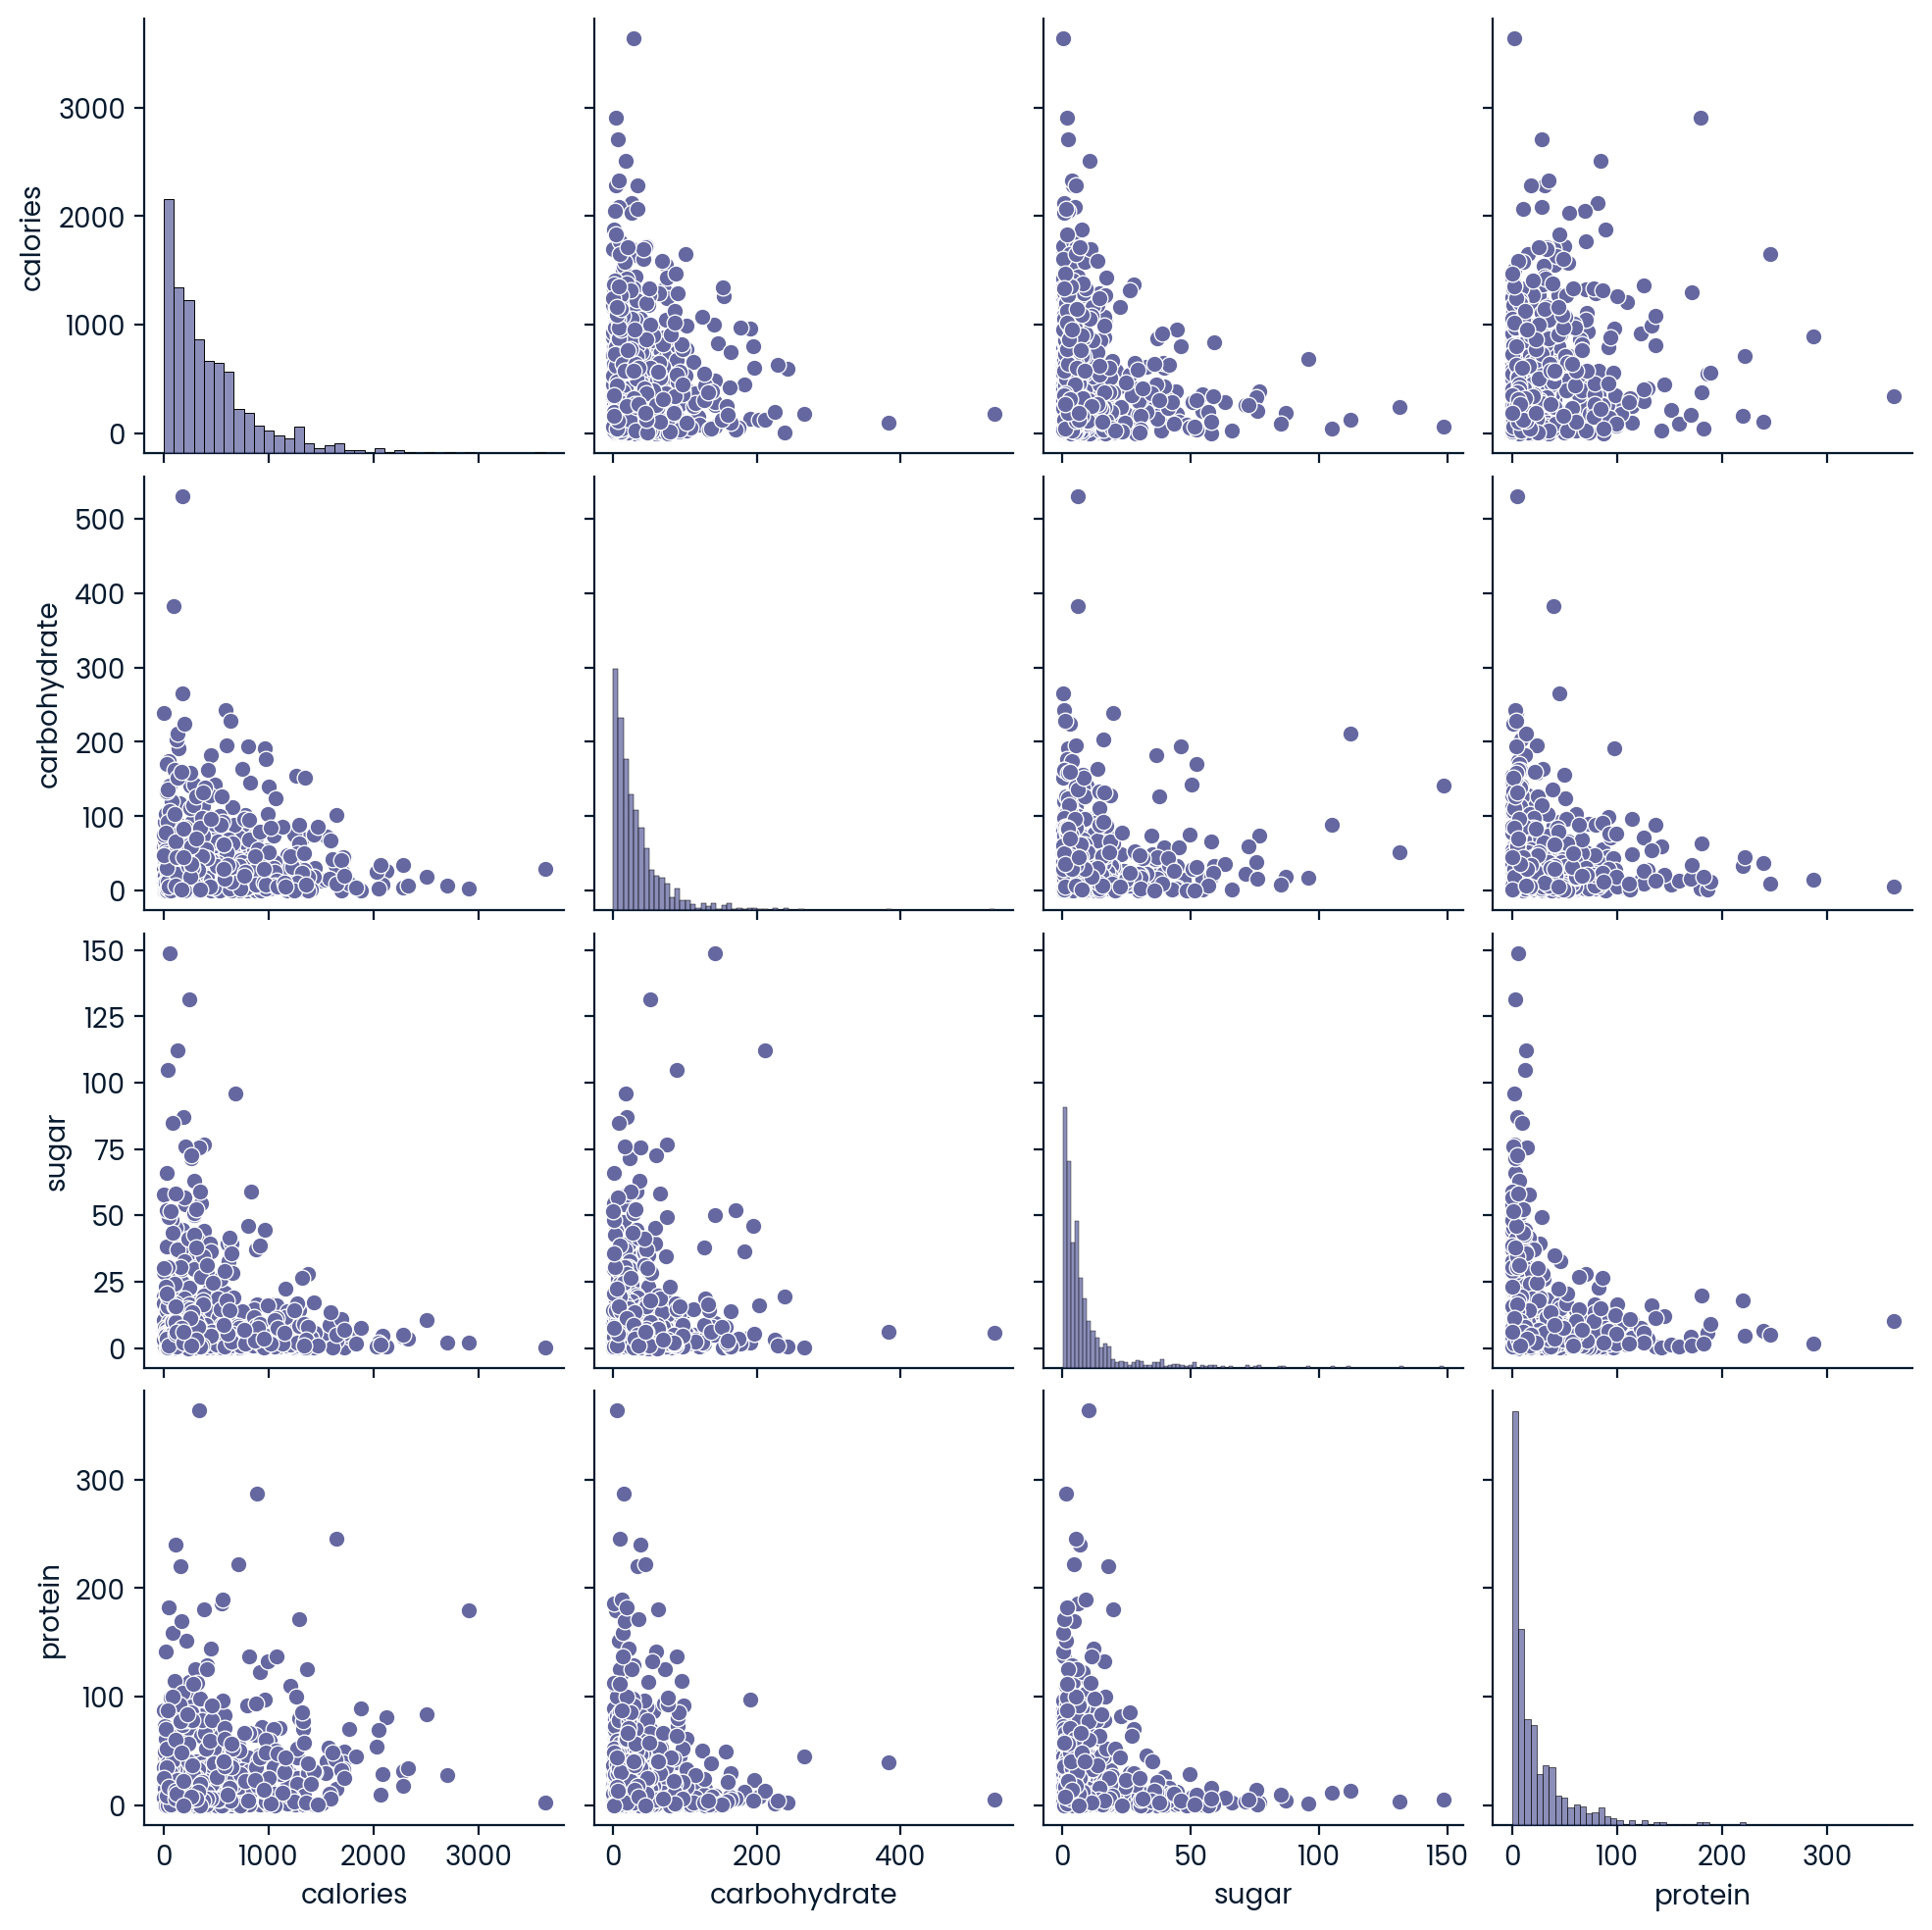

In [18]:
sns.pairplot(site_traffic[['calories', 'carbohydrate', 'sugar', 'protein']])
plt.show()

There is no strong linear relationship or significant correlation observed between any of the variables. The scatterplots show scattered data points without clear trends or patterns. This suggests that the numeric variables are relatively independent of one another.

## Does servings size influence traffic
Now we explore the relationship between serving size and traffic. 

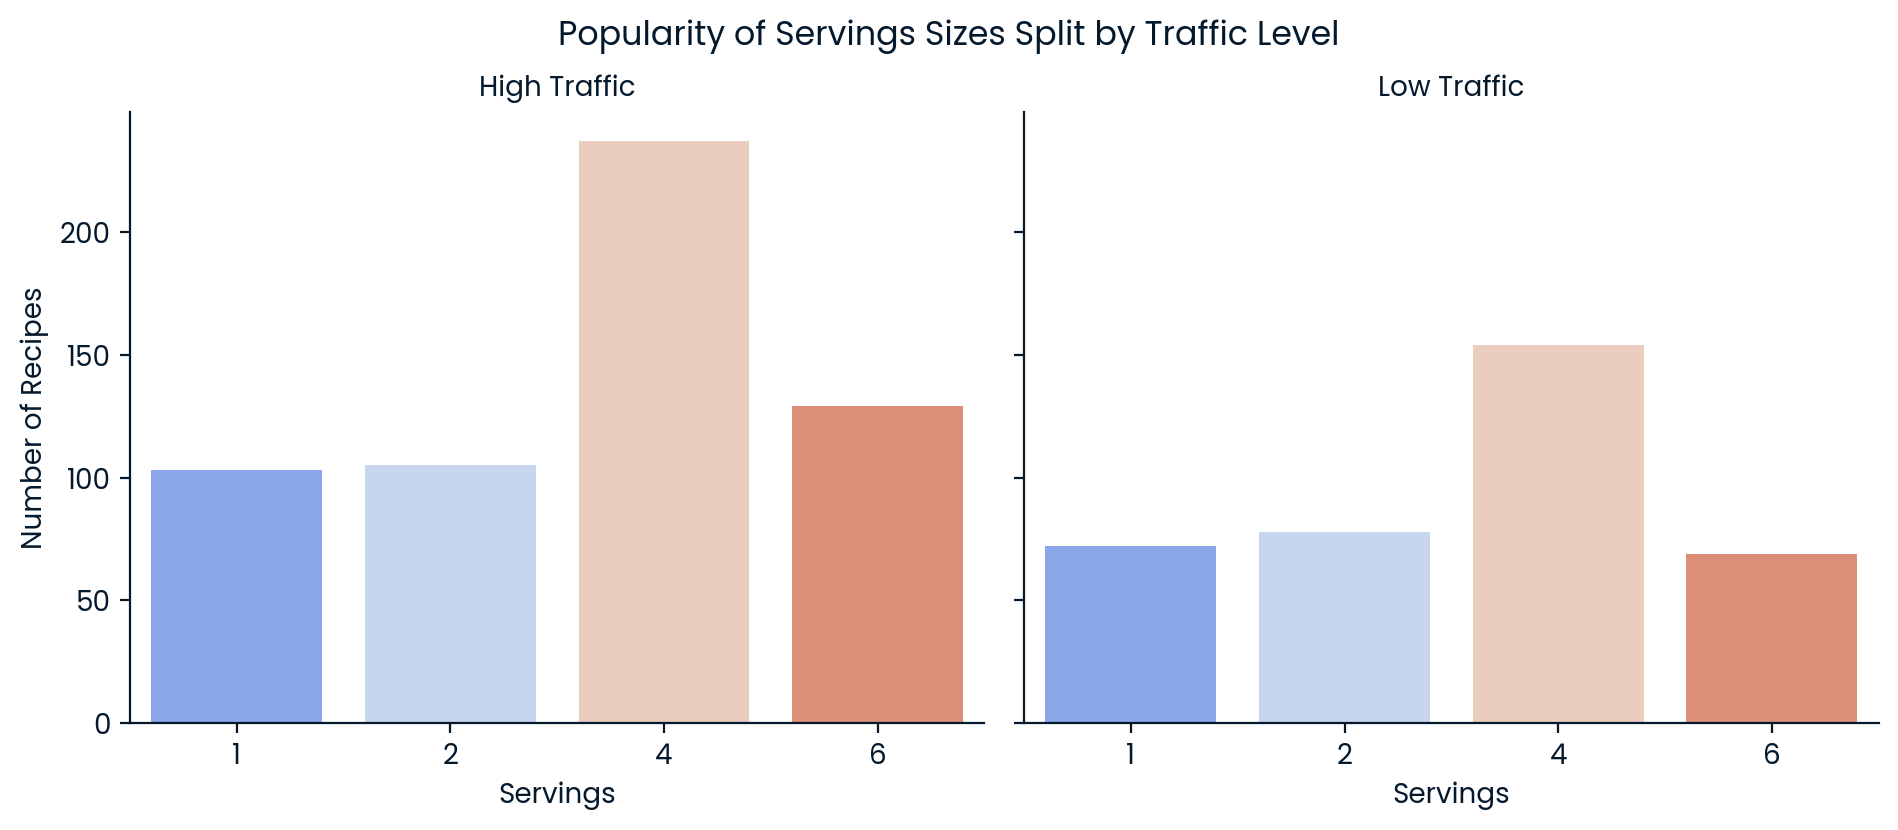

In [31]:

# Create a facet grid to explore the two variables
g = sns.FacetGrid(site_traffic, col="high_traffic", height=4, aspect=1.2, sharey=True)
g.map(sns.countplot, "servings", order=[1, 2, 4, 6], palette='coolwarm')
g.set_titles("{col_name} Traffic")
g.set_axis_labels("Servings", "Number of Recipes")
g.fig.suptitle('Popularity of Servings Sizes Split by Traffic Level', y=1.03)
plt.show()

Recipes with 4 servings are the most popular, both in terms of overall count and the traffic they generate. This serving size consistently attracts higher engagement on the site, likely indicating its suitability for typical household or group meal preferences.

While recipes with 6 servings are less frequent, they tend to generate more traffic compared to those with 1 or 2 servings. This suggests that larger portion sizes might appeal more to audiences seeking family-style or batch-cooking recipes, even if they are not as commonly offered.

On the other hand, recipes with 1 or 2 servings are the least engaging in terms of traffic, which could indicate they cater to a niche audience or are less aligned with the needs of the general user base. These patterns highlight the importance of balancing serving size options to cater to user preferences while maximizing traffic potential.

## What Insights did we derive Overall?
A little over 60% of recipes that were provided generated High traffic while 39% generated low traffic. Of the High-traffic recipes, a significant portion of them were seen in categories like Potatoes,Vegetables and Pork. High-traffic recipes were also more common among recipes wit 4 and 6 servings than 1 or 2. 

This indicates that both the category and serving size of a recipe play a crucial role in driving engagement. Recipes with 4 servings, being the most popular overall, seem to strike the ideal balance for a majority of users, while recipes with 6 servings cater to a smaller but highly engaged audience. Conversely, 1- and 2-serving recipes, while present, do not generate as much traffic, potentially reflecting a mismatch with the preferences or needs of the site's audience. These insights emphasize the need to prioritize categories and serving sizes that align with user demand to boost overall site engagement.

# MACHINE LEARNING
The goal of this project is to predict which recipes are high traffic and which are not. This leads to a classification model. Firstly we perform the preliminary steps of diving the data into then splitting the dataset into to training data and test data. We create a baseline model to test for a baseline accuracy. This perform the simpe function of comparison. Our classification model has to perform better than our baseline model.

We proceed to create various pipelines for various models to tests which precison is best. The steps incluse but are not limited to:
1. encoding
2. scaling and maybe normalizing 
3. classifier
4. crossvalidation
5. Under fitting and overfitting tests
6. Feature Importance


## Separating Features and Target Variables; Test and Trainig Data
We drop redundant data like the recipes column since it contais unique integers for each recipe in the data. Then we split and encode the target variable for easy computation by the model


In [20]:
#importing the necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [21]:
#encoding the target variable
site_traffic.high_traffic_encoded=np.where(site_traffic.high_traffic=='High',1,0)

In [22]:
X=site_traffic.drop(columns=['recipe','high_traffic'])
y=site_traffic.high_traffic_encoded
y.shape

(947,)

In [23]:
#X.servings=X.servings.astype('str')
X.servings.dtype

dtype('int64')

In [24]:
#splitting into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

## Creating The Baseline Model
Precision is used as the metric to test the performance of the models. Using  a dummy classifier, we create a baseline precision of 0.62. Any of the models that would be created now must a higher precision.

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

#Creating a dummy classifier to check for a baseline precision

# Initialize a DummyClassifier with a strategy 
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Fit the DummyClassifier to the training data
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate performance
precision_dummy = precision_score(y_test, y_pred_dummy)
print('Baseline Precision with DummyClassifier:', precision_dummy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dummy))


Baseline Precision with DummyClassifier: 0.6210526315789474

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.62      1.00      0.77       118

    accuracy                           0.62       190
   macro avg       0.31      0.50      0.38       190
weighted avg       0.39      0.62      0.48       190



## Using a Function to create models
Our classification model is built using a function to prevent repetition. With the function we
- seperate features into categorical and numerical data
- apply preprocessing steps of standard scaling and one hot encoding to the numerical and categorical variables respectively
- creating a pipeline for the preprocessing steps and the model
- Fitting the training data and predicting with the validation data
- Comparing test precision and training precision to check for overfitting



In [26]:
def classifier_a(classifier_n, param_grid: dict, n_iter=30):
    '''
    classifier_n: Classifier model name
    param_grid (dict): Dictionary with the hyperparameters
    n_iter: Number of iterations for RandomizedSearchCV
    
    Output: 
    - Precision scores for training and test sets
    - Overfitting/Underfitting detection
    - Feature importance visualization (if supported)
    '''
    # Separate numerical and categorical features
    categorical_features = X.select_dtypes(include='O').columns.tolist()
    numerical_features = X.select_dtypes(exclude='O').columns.tolist()
    
    # Preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', classifier_n(random_state=42))
    ])
    
    # Initialize RandomizedSearchCV
    grid_search = RandomizedSearchCV(estimator=pipeline,
                                     param_distributions=param_grid,
                                     scoring='precision', 
                                     cv=4, 
                                     verbose=1,
                                     n_iter=n_iter,
                                     random_state=42,
                                     n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predictions on training and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Compute precision scores
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    best_params = grid_search.best_params_

    # Display precision results
    print('---' * 30)
    print(f'Train precision: {train_precision:.3f}')
    print(f'Test precision: {test_precision:.3f}')
    print(f"Best parameters: {best_params}")
    print('---' * 30)

    # Overfitting/Underfitting Detection
    if train_precision > 0.9 and test_precision < 0.8:
        print("The model is overfitting: High training precision, but lower test precision.")
    elif train_precision < 0.7 and test_precision < 0.7:
        print("The model is underfitting: Low precision on both training and test sets.")
    else:
        print("The model is performing well without significant overfitting or underfitting.")
    
    # Feature Importance Visualization (if supported)
    if hasattr(best_model.named_steps['model'], 'feature_importances_'):
        # Combine preprocessed feature names
        onehot_columns = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
        feature_names = np.concatenate([numerical_features, onehot_columns])
        
        # Extract feature importances
        importances = best_model.named_steps['model'].feature_importances_
        
        # Create a DataFrame
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
        plt.title('Top 10 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

    elif hasattr(best_model.named_steps['model'], 'coef_'):
        # Handle models like Logistic Regression with coefficients
        onehot_columns = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
        feature_names = np.concatenate([numerical_features, onehot_columns])
        
        # Extract coefficients and calculate absolute importance
        coefficients = best_model.named_steps['model'].coef_[0]
        
        # Create a DataFrame
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients
        }).sort_values(by='Importance', key=np.abs, ascending=False)  # Sort by absolute importance
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
        plt.title('Feature Importances (Logistic Regression Coefficients)')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print("Feature importance or coefficients are not supported for this model.")


### Decision Tree Classifiers
We input parameters and a decision tree classifier into the function and derive a training precision of 0.957 and a test precision of 0.757. This is a clear example of overfitting, where the model learns the training data too well, including its noise and specific patterns, but fails to generalize to unseen data. As a result, the model's performance on the test set suffers, indicating that it has likely become too complex for the dataset

Fitting 4 folds for each of 30 candidates, totalling 120 fits
------------------------------------------------------------------------------------------
Train precision: 0.957
Test precision: 0.757
Best parameters: {'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'auto', 'model__max_depth': 20, 'model__criterion': 'entropy'}
------------------------------------------------------------------------------------------
The model is overfitting: High training precision, but lower test precision.


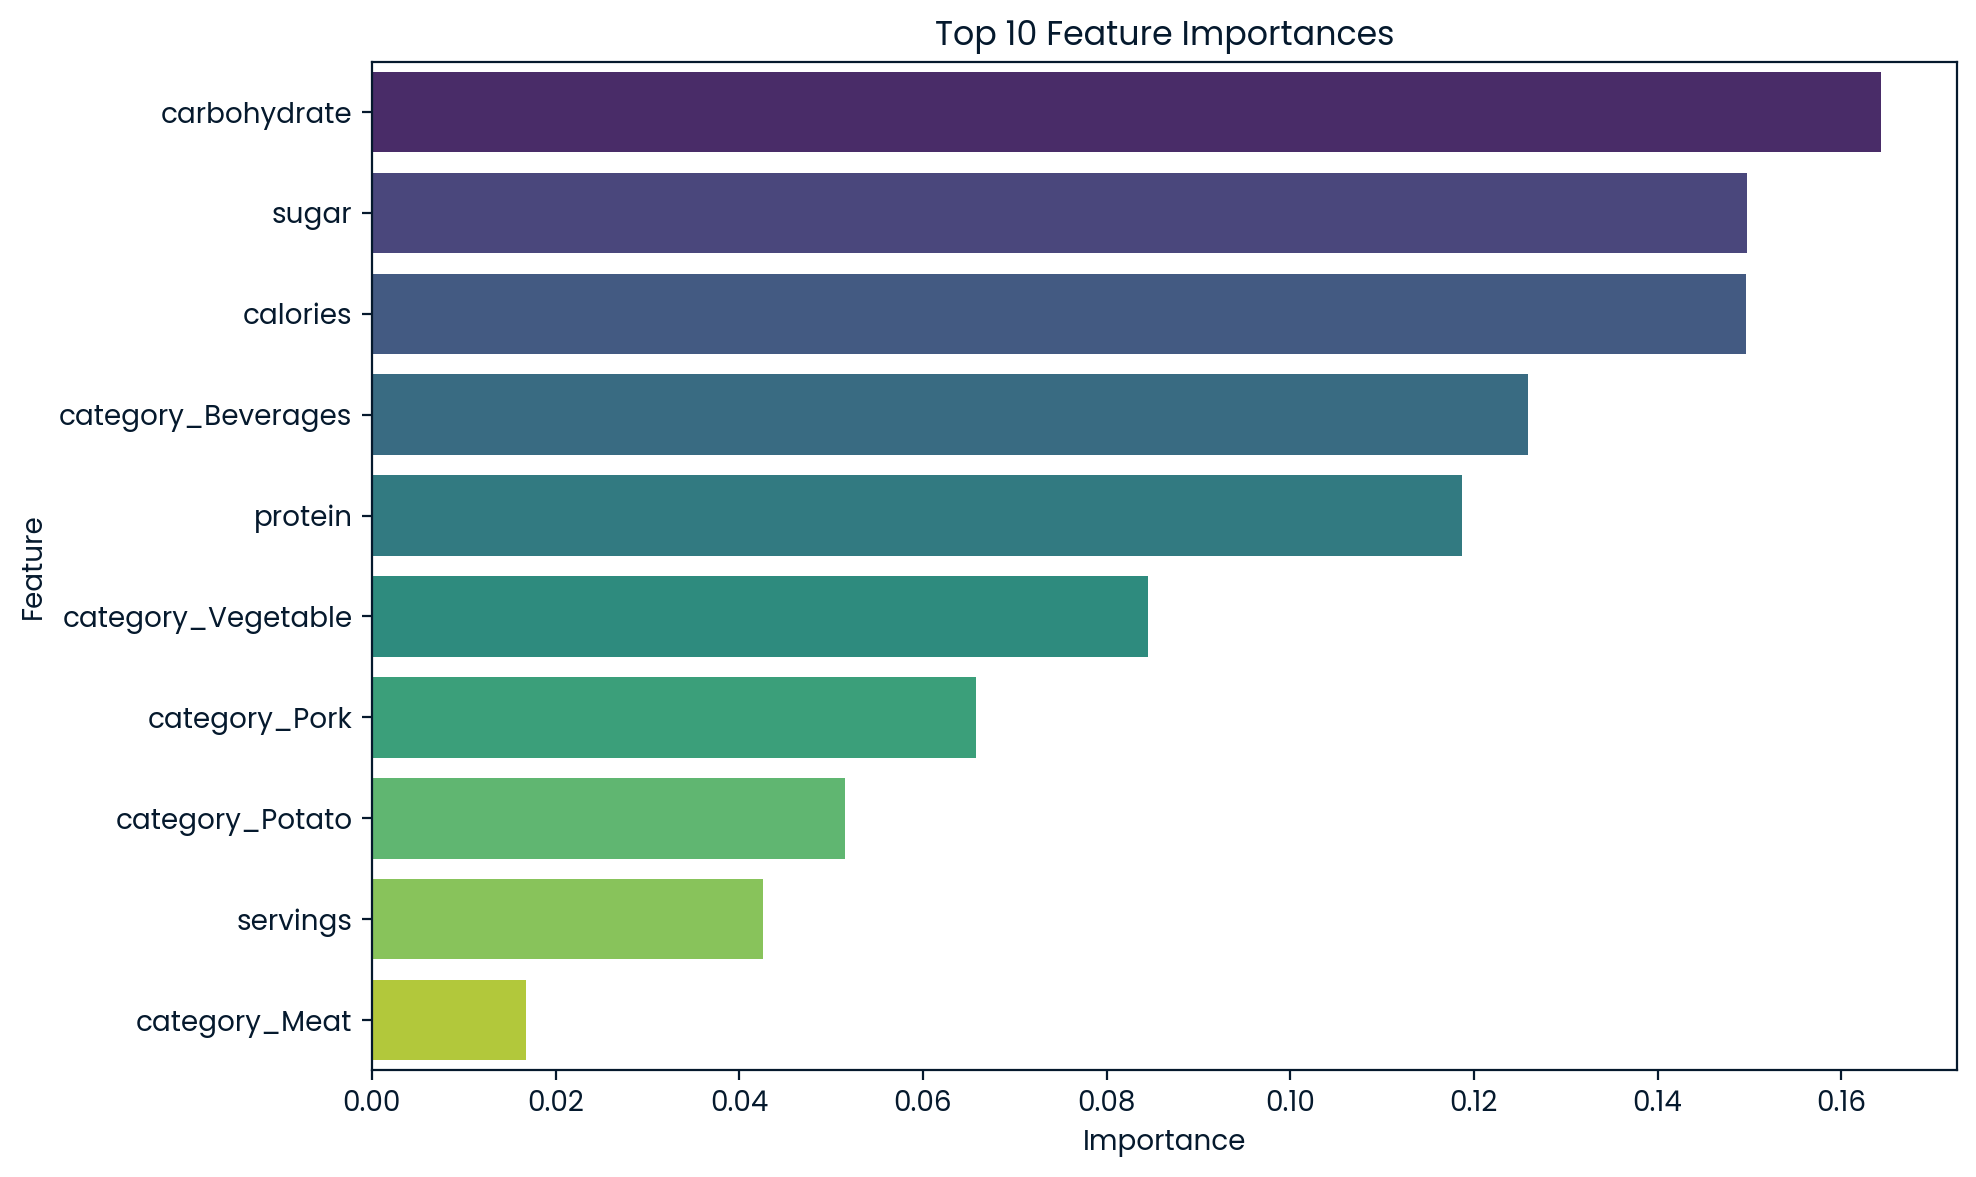

In [27]:
param_grid_dtc = {
    'model__max_depth': [1,10,20,],
    'model__min_samples_split': [1,2, 5],
    'model__min_samples_leaf': [ 2,3, 4],
    'model__criterion': ['entropy', 'gini'],
    'model__max_features':['auto','sqrt','log2']
}

classifier_a(DecisionTreeClassifier, param_grid=param_grid_dtc)

### Random Forest Classifiers
We input parameters and a random forest classifier into the function and derive a training precision of 0.816 and a test precision of 0.8. There is no underfittin or overfitting but still not the best precision score that can be derived.

Fitting 4 folds for each of 15 candidates, totalling 60 fits
------------------------------------------------------------------------------------------
Train precision: 0.816
Test precision: 0.800
Best parameters: {'model__n_estimators': 600, 'model__min_samples_split': 3, 'model__min_samples_leaf': 10, 'model__max_leaf_nodes': 15000, 'model__max_depth': 15, 'model__criterion': 'gini', 'model__bootstrap': True}
------------------------------------------------------------------------------------------
The model is performing well without significant overfitting or underfitting.


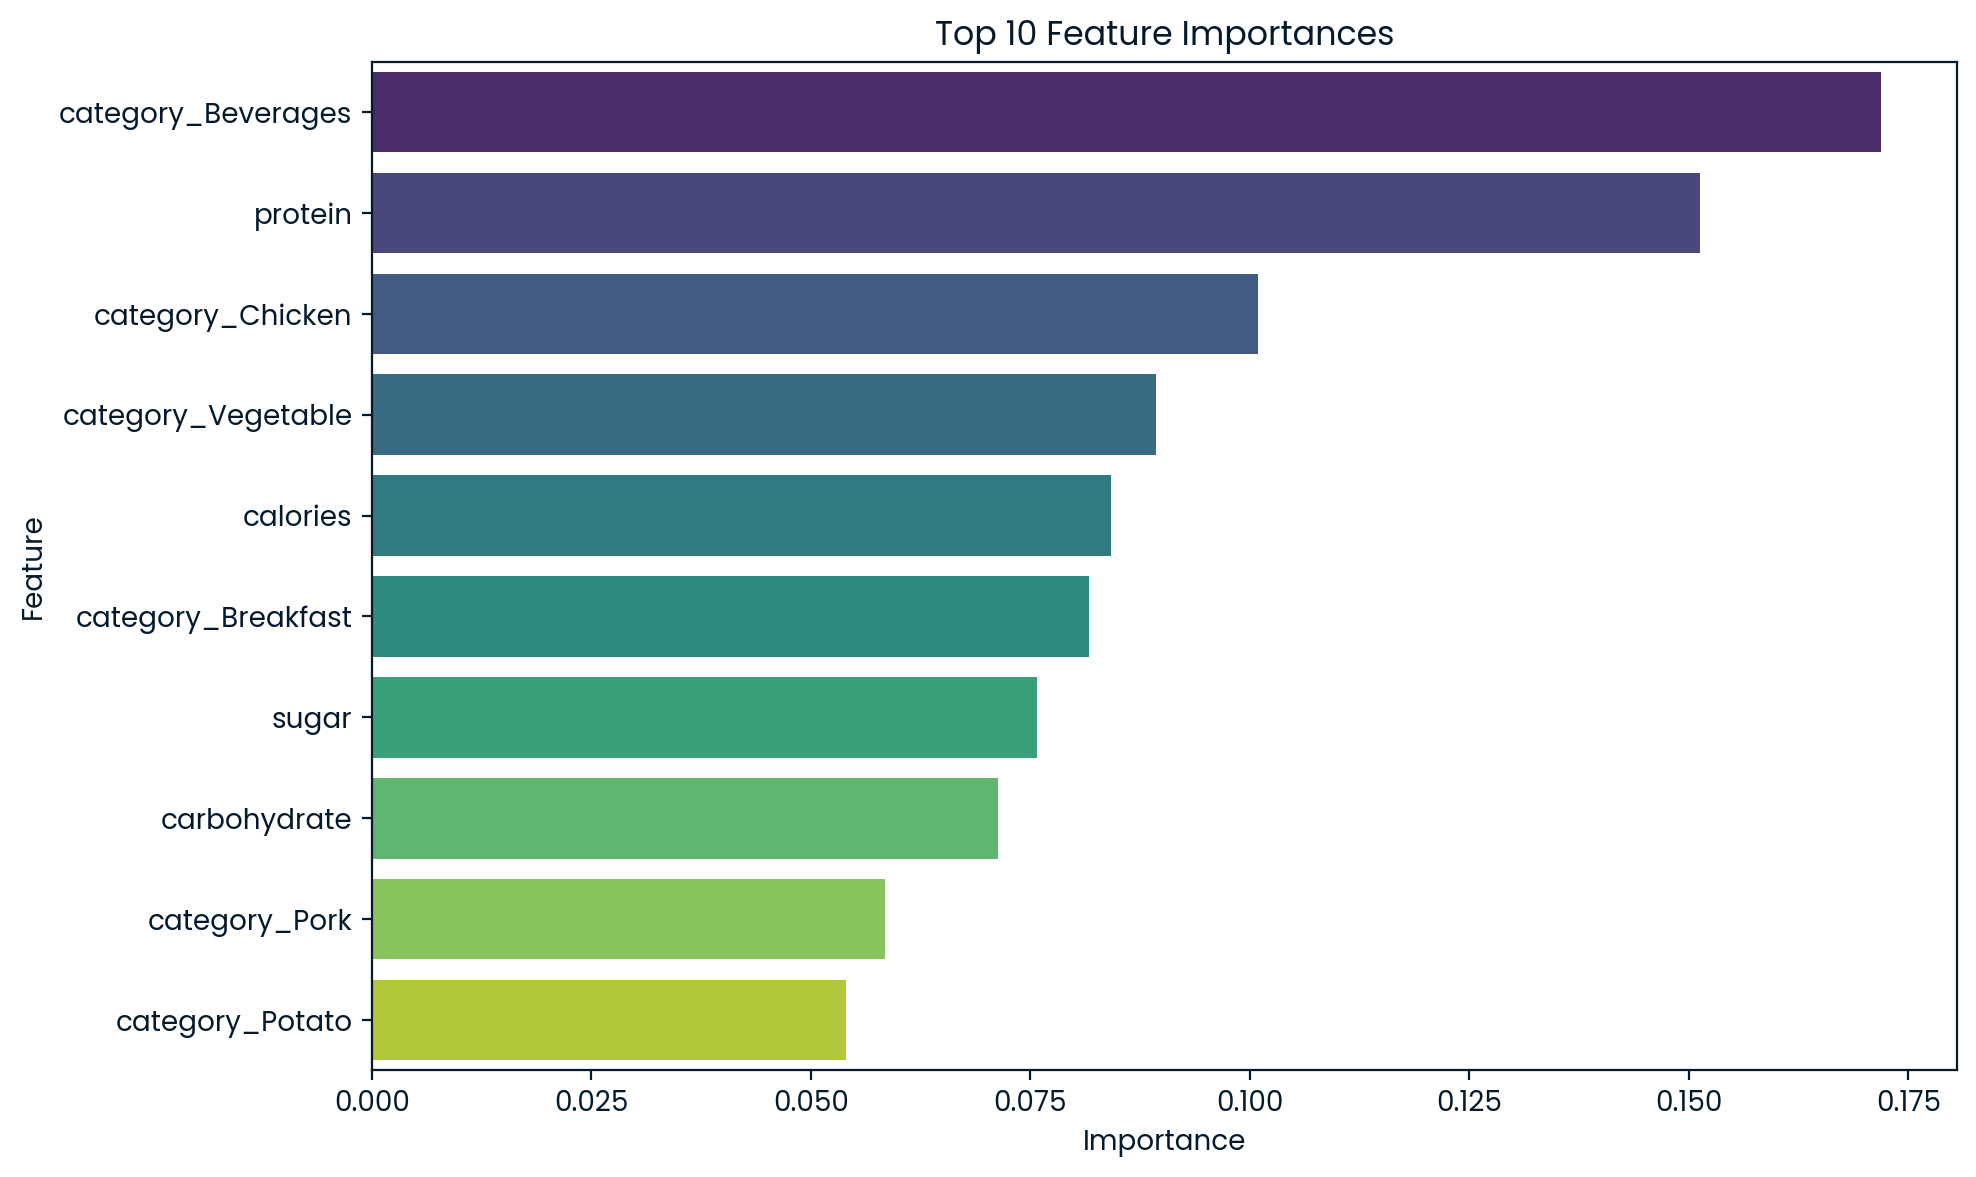

In [28]:
#using a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to tune the hyperparameters for RandomForestClassifier
param_grid_rfc = {
    'model__n_estimators': [100, 200, 300, 500,600,700,800,900],
    'model__max_depth': [10,15, 20, 30, None],
    'model__min_samples_split': [1,2,3,4, 5, 10],
    'model__min_samples_leaf': [1, 2, 4,6,8,10],
    'model__max_leaf_nodes': [15000],
    'model__bootstrap': [True],
    'model__criterion': ['gini']
}

classifier_a(RandomForestClassifier, param_grid=param_grid_rfc, n_iter=15)

### Logistic Regression
With Logistic Regression, we see a training precision of 0.811 and a test precision of 0.819. This indicates that the model is well-balanced, performing consistently across both the training and test datasets. The close alignment of these precision scores suggests that the model generalizes well to unseen data, without overfitting or underfitting. 

Fitting 4 folds for each of 15 candidates, totalling 60 fits
------------------------------------------------------------------------------------------
Train precision: 0.811
Test precision: 0.819
Best parameters: {'model__solver': 'saga', 'model__penalty': 'none', 'model__max_iter': 200, 'model__fit_intercept': False, 'model__class_weight': 'balanced', 'model__C': 100}
------------------------------------------------------------------------------------------
The model is performing well without significant overfitting or underfitting.


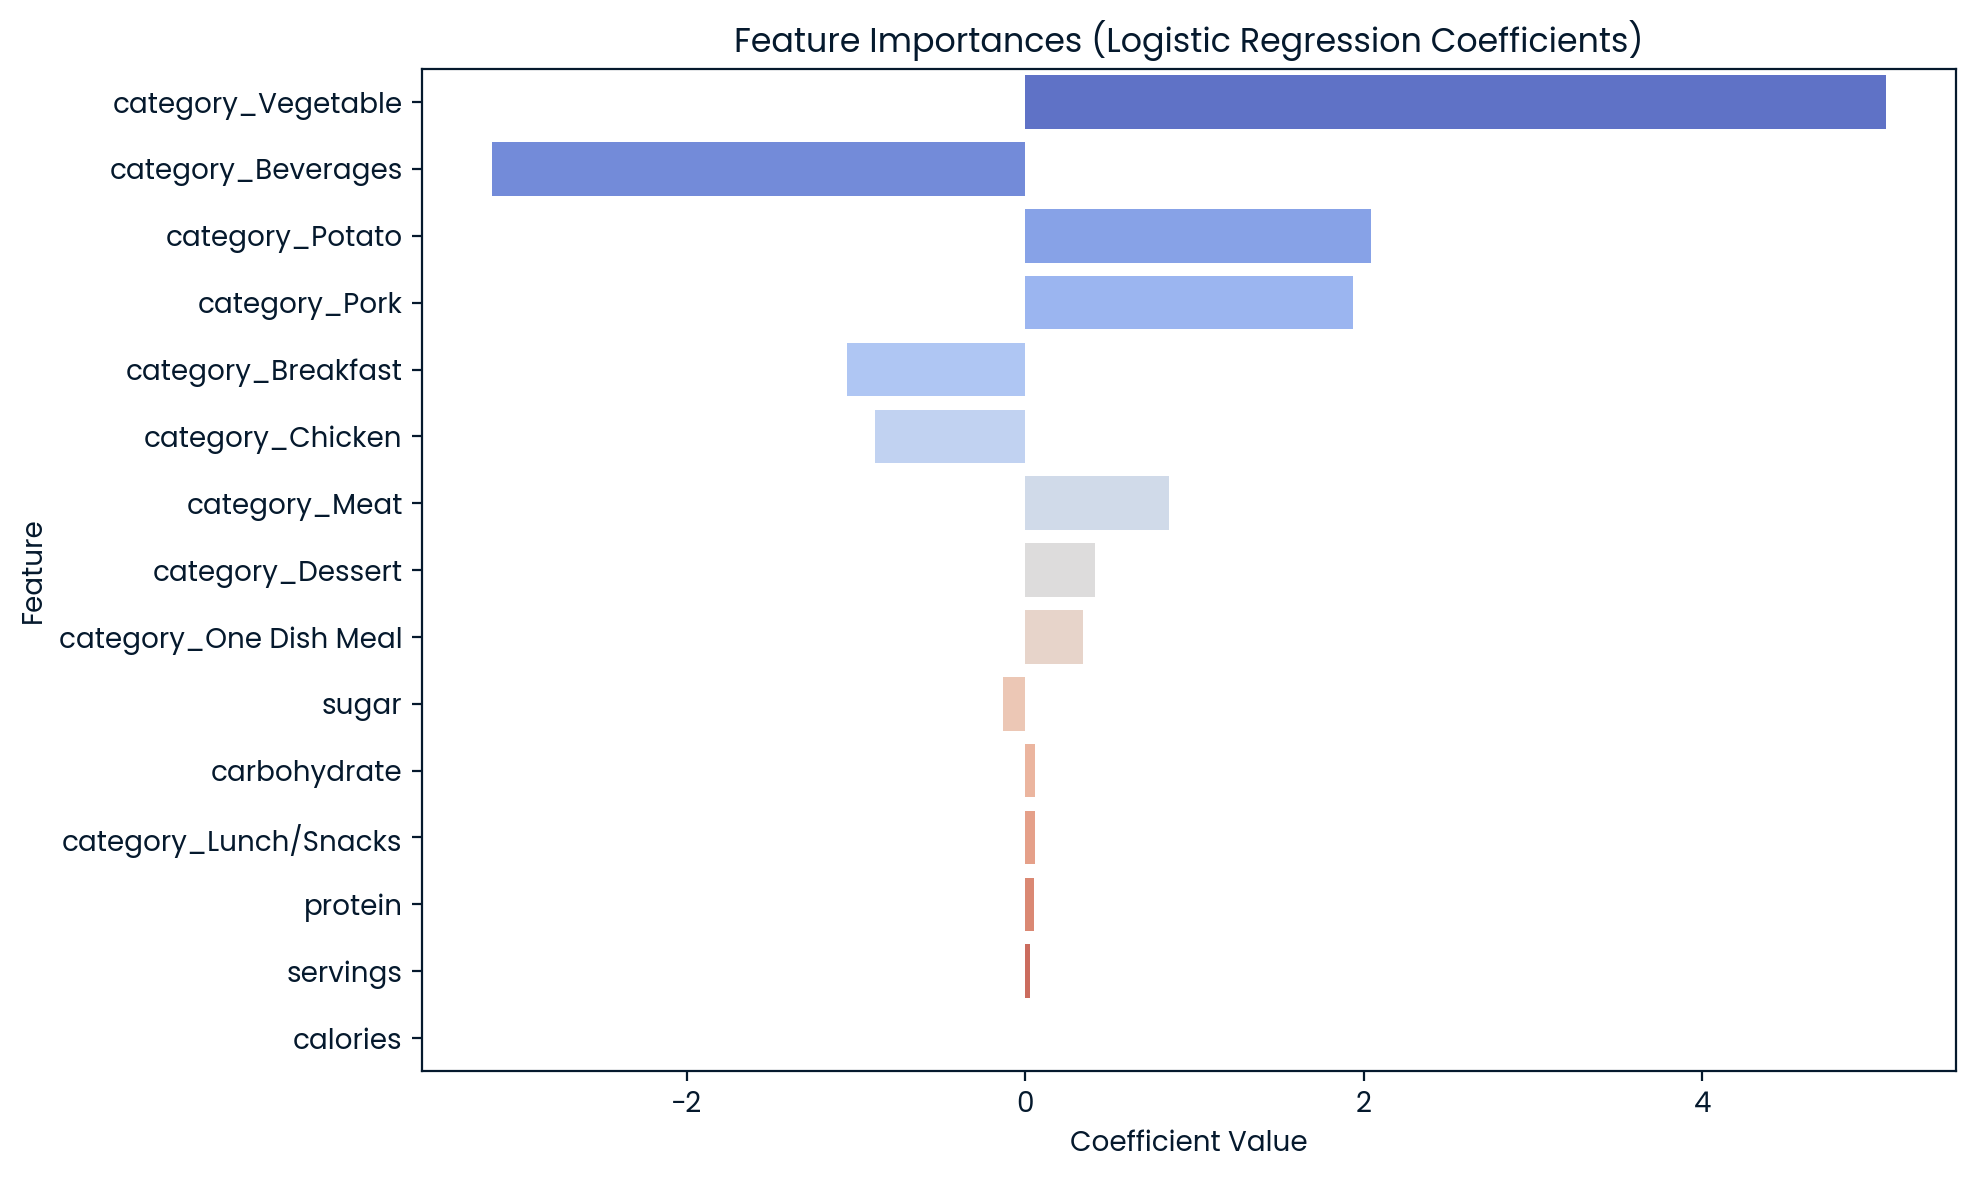

In [29]:
from sklearn.linear_model import LogisticRegression
param_grid_lgs = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__solver': ['liblinear', 'saga', 'lbfgs'],  # Optimizers (compatible with penalties)
    'model__max_iter': [100, 200,300,400, 500,800],  # Maximum number of iterations
    'model__class_weight': [None, 'balanced'],  # Class weights
    'model__fit_intercept': [True, False],  # Whether to fit the intercept
}


classifier_a(LogisticRegression,param_grid=param_grid_lgs,n_iter=15)

# Aligning Model Performance with Business Metrics

Given the clear business goal of achieving up to a 40% increase in traffic by showcasing popular recipes, the model's primary objective is to predict which recipes will generate high traffic. To evaluate the effectiveness of the models, we need to link their performance to this business impact. Specifically, we aim to ensure that the model not only predicts high-traffic recipes accurately but also captures a significant portion of the recipes that drive the highest engagement.

To quantify success, we focus on precision, and its impact on traffic.

### Logistic Regression:
Logistic Regression achieves consistent training and test precision (0.811 and 0.819, respectively), suggesting that it generalizes well. With high recall, it effectively identifies a large portion of high-traffic recipes, ensuring the 40% traffic increase is more achievable. This model strikes a balance between precision and recall, minimizing the risk of resource wastage on less engaging recipes while capitalizing on popular ones.


# SUMMARY
## Data Exploration
With Data Exploration and Feature Importance from the Models, we establish the following conclusions
1. **Calories, Protein,Carbohydrate and Sugar**: These columns do not have a large correlation with the data and are also not great impactors of traffic
2. **Category**: The Category column has a big impact on site trafiic. We see categories like Vegetable, Pork and Potato having a large high to low traffic ratio as well as having high importance as a feature in the model
3. **Serving**: Though not having a big impact on traffic, in data exploration we see that recipes with 4 servings are more popular and generate more traffic than the rests.

# BUSINESS RECOMMENDATIONS
## Focus on Popular Categories to Boost Engagement
Since the Category column is a significant predictor of site traffic, prioritize featuring recipes from high-performing categories such as Vegetable, Pork, and Potato.Homepage placements should highlight these categories to capitalize on their higher high-to-low traffic ratio. This targeted approach can maximize visitor engagement and conversion rates.

## Optimize Serving Sizes in Recipe Content
Recipes with 4 servings tend to be the most popular and generate more traffic compared to other serving sizes. Tailor recipe recommendations or filters to emphasize 4-serving recipes. Additionally, consider experimenting with resizing popular recipes to a 4-serving format to see if traffic increases.

## Minimize Focus on Nutritional Metrics for Traffic Growth
Features like Calories, Protein, Carbohydrate, and Sugar show minimal correlation with traffic and were not strong predictors in the model. Efforts to optimize recipes or marketing around these attributes are unlikely to result in significant increases in site engagement. Instead, resources should be reallocated to emphasize more impactful factors, such as category-focused personalization.

## Leverage Predictive Insights for Personalized Recommendations
Utilize the predictive model to identify recipes with a high likelihood of generating traffic. Deploy these insights in recommendation algorithms, promoting high-traffic recipes dynamically based on user preferences and browsing behavior.

## Test Alternative Engagement Strategies for Low-Traffic Categories
Categories such as Breakfast and Beverages have a low high-to-low traffic ratio. Conduct targeted experiments, such as pairing these recipes with high-traffic items or promoting them during specific times (e.g., morning hours for breakfast), to evaluate their potential for growth.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [ ]:
# fill in the package or function you want help with and run the cell
help(_____)

In [ ]:
# fill in the package or function you want help with and run the cell
help(_____)